Exercise 2 The goal of this exercise is to explore the effect of diff and differentiate on a signal. Create a triangle wave and plot it. Apply diff and plot the result. Compute the spectrum of the triangle wave, apply differentiate, and plot the result. Convert the spectrum back to a wave and plot it. Are there differences between the effect of diff and differentiate for this wave?

In [1]:
%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd
import scipy.signal

# suppress division by zero warning
from warnings import simplefilter
simplefilter('ignore', RuntimeWarning)

PI2 = 2 * np.pi
GRAY = '0.7'

No handles with labels found to put in legend.


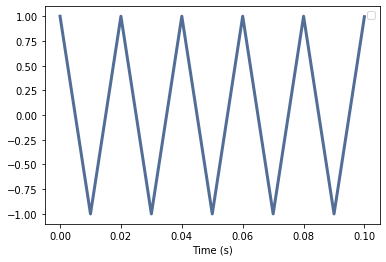

In [2]:
in_wave = thinkdsp.TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

三角波的差異是方波，這說明了為什麼方波中的諧波像1 / f 一樣下降，像1 / f 

No handles with labels found to put in legend.


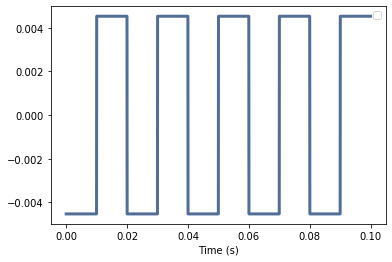

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

方波的累積和是三角波

No handles with labels found to put in legend.


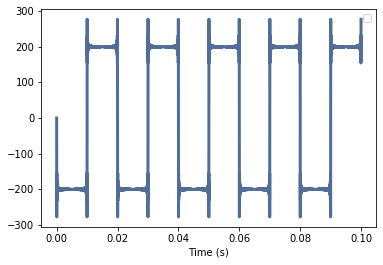

In [4]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Exercise 3 The goal of this exercise is to explore the effect of cumsum and integrate on a signal. Create a square wave and plot it. Apply cumsum and plot the result. Compute the spectrum of the square wave, apply integrate, and plot the result. Convert the spectrum back to a wave and plot it. Are there differences between the effect of cumsum and integrate for this wave?

No handles with labels found to put in legend.


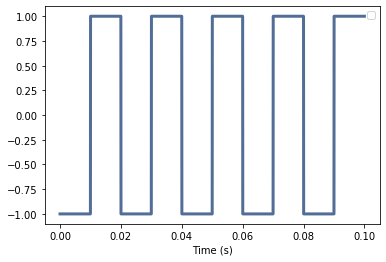

In [5]:
in_wave = thinkdsp.SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

No handles with labels found to put in legend.


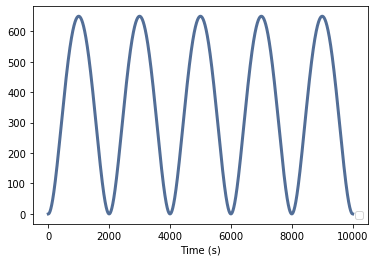

In [22]:
out_wave = in_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

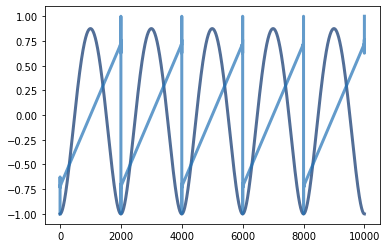

In [23]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

In [24]:
max(abs(out_wave.ys - out_wave2.ys))

1.9999999999291813

Exercise 4 The goal of this exercise is the explore the effect of integrating twice. Create a sawtooth wave, compute its spectrum, then apply integrate twice. Plot the resulting wave and its spectrum. What is the mathematical form of the wave? Why does it resemble a sinusoid?

No handles with labels found to put in legend.


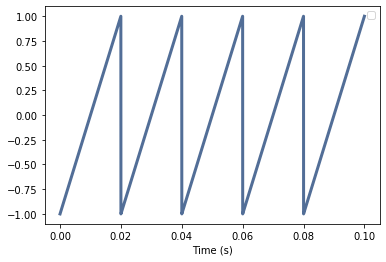

In [10]:
in_wave = thinkdsp.SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

No handles with labels found to put in legend.


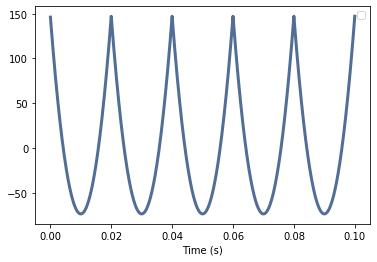

In [11]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

No handles with labels found to put in legend.


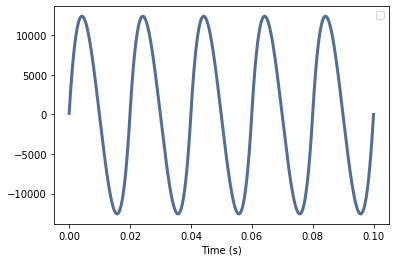

In [12]:
out_wave = out_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

No handles with labels found to put in legend.


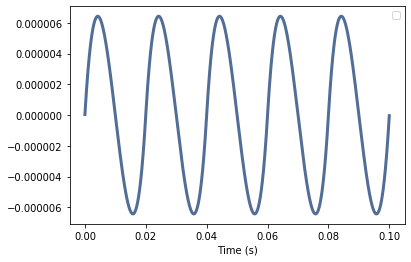

In [13]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

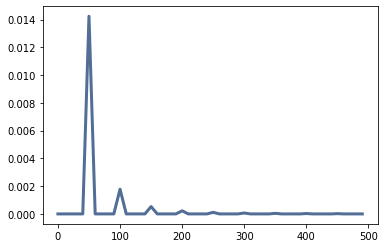

In [14]:
out_wave2.make_spectrum().plot(high=500)

Exercise 5 The goal of this exercise is to explore the effect of the 2nd difference and 2nd derivative. Create a CubicSignal, which is defined in thinkdsp. Compute the second difference by applying diff twice. What does the result look like? Compute the second derivative by applying differentiate to the spectrum twice. Does the result look the same?
Plot the filters that correspond to the 2nd difference and the 2nd derivative and compare them. Hint: In order to get the filters on the same scale, use a wave with frame rate 1.

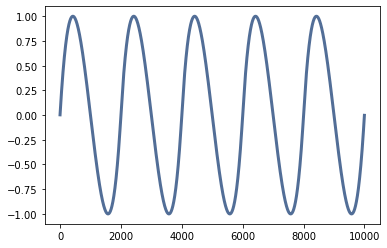

In [15]:
in_wave = thinkdsp.CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

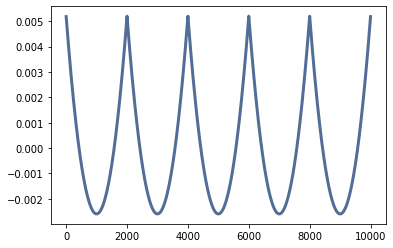

In [16]:
out_wave = in_wave.diff()
out_wave.plot()

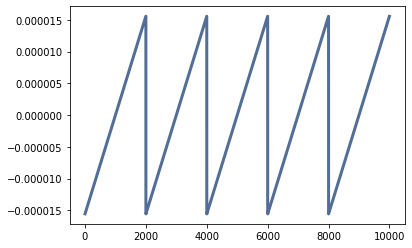

In [17]:
out_wave = out_wave.diff()
out_wave.plot()

No handles with labels found to put in legend.


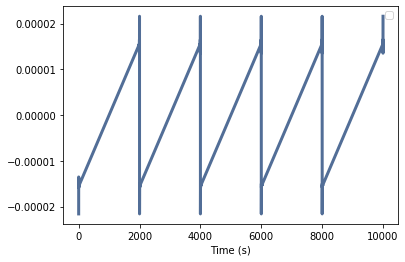

In [18]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

第二個差的窗口是-1、2，-1。 通過計算窗口的DFT。

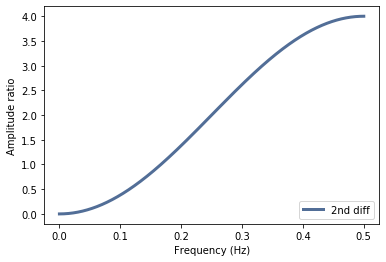

In [19]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = thinkdsp.zero_pad(diff_window, len(in_wave))
diff_wave = thinkdsp.Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 loc='lower right')

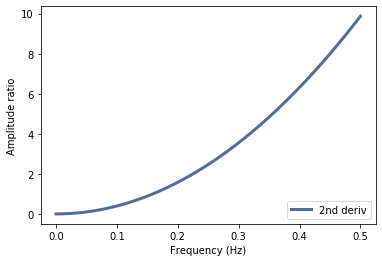

In [20]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 loc='lower right')

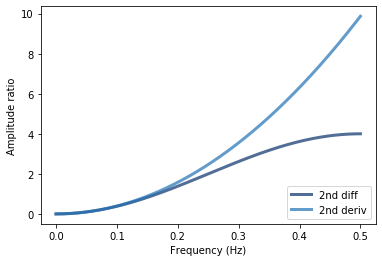

In [21]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 loc='lower right')

二階導數是拋物線形的，會放大最高頻率。 
二階差僅在最低頻率下才是近似值，然後會出現明顯偏差。